In [1]:
# !pip install jieba
# !pip install wordcloud

In [2]:
import re, os, random
# stopwords 1 2
import nltk, jieba
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multidict as multidict

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# https://ithelp.ithome.com.tw/articles/10228481
from PIL import Image
from wordcloud import WordCloud

In [3]:
print(os.getcwd())
# os.listdir(os.getcwd())

d:\個人資料\YiCheng\course\DataMining\HW2_310653005_洪翊誠


In [4]:
FILE_ROOT = ''
FILE_NAME = 'yelp.csv'
SAVE_NAME = 'yelp_new.csv'

# pd.set_option('display.max_columns', 500)
df = pd.read_csv(os.path.join(FILE_ROOT, FILE_NAME))
display(df.head())

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## DataPreprocess (class)

In [5]:
import nltk
import jieba
import re
from nltk.corpus import stopwords
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

class DataPreprocess:
    def __init__(self, df):
        self.df = df.copy()
        self.stopwords = set(stopwords.words("english"))
        
    def remove_punctuation(self, text):
        """
        Remove punctuation from a given text
        """
        return re.sub(r'[0-9\.\-\!\"\(\)\,]', '', text.lower()).split(' ')
    
    def remove_stopwords(self, text):
        """
        Remove stopwords from a given text
        """
        # words = re.sub("[^a-zA-Z]"," ", text).lower().split()
        # convert to lower case and split at whitespace
        words = text.split()
        return [w for w in words if w not in self.stopwords]
    
    def convert_list_to_str(self, df, columns=['sentence1','sentence2', 'sentence3']):
        for k in columns:
            df[k] = df[k].apply(lambda x:' '.join(x))
        return df
    

    def run(self):
        text_df = self.df[['text']]
        text_df['sentence1'] = text_df['text'].map(self.remove_punctuation)
        text_df['sentence2'] = text_df['text'].apply(self.remove_stopwords)
        text_df['sentence3'] = text_df['text'].apply(jieba.lcut) # Take time
        text_df['stars'] = self.df['stars']
        text_df['label'] = self.df['stars'].map(lambda x: int(x>=4))
        text_df = self.convert_list_to_str(text_df)
        return text_df


In [6]:
DP = DataPreprocess(df)
data = DP.run()
display(data.head(5))
data.to_csv(os.path.join(FILE_ROOT, SAVE_NAME), index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_19584\808142894.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentence1'] = text_df['text'].map(self.remove_punctuation)
C:\Users\USER\AppData\Local\Temp\ipykernel_19584\808142894.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentence2'] = text_df['text'].apply(self.remove_stopwords)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.554 seco

,text,sentence1,sentence2,sentence3,stars,label
0,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,My wife took birthday breakfast excellent. The...,My wife took me here on my birth...,5,1
1,I have no idea why some people give bad review...,i have no idea why some people give bad review...,I idea people give bad reviews place. It goes ...,I have no idea why some people g...,5,1
2,love the gyro plate. Rice is so good and I als...,love the gyro plate rice is so good and i also...,love gyro plate. Rice good I also dig candy se...,love the gyro plate . Rice is so ...,4,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park it'...,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...","Rosie , Dakota , and I LOVE Chaparra...",5,1
4,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg no...,General Manager Scott Petello good egg!!! Not ...,General Manager Scott Petello is a ...,5,1


In [7]:
# for column in data.columns:
#     print(type(column), type(data[column].iloc[0]))
#     print(column, data[column].iloc[0])
#     break

## DataSplitter
將處理好的資料根據標籤0,1數量依比例評分成5份，  
新增type,fold欄位儲存資料狀態以及對應的第k份資料  

In [8]:
TRAIN_RATIO=0.8
TEST_RATIO=0.2
K_FOLD = 5
FILE_ROOT = ''
FILE_NAME = 'yelp_new.csv'
SAVE_NAME = 'yelp_new2.csv'

In [9]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import argparse


In [10]:

def split_train_test(df, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    tmpX, y = np.array(data['label']), np.array(data['label'])
    df['fold']=0
    df['type']='train'
    ctr=0
    for _ , test_index in skf.split(tmpX, y):
        if ctr==0:
            df.loc[test_index, ['type']]='test'
        df.loc[test_index, ['fold']]=ctr
        ctr+=1
    return df


def save_csv(df, saveroot, filename='yelp_new2.csv'):
    df.to_csv(os.path.join(saveroot, filename), index=False)
    return df

In [11]:
df = pd.read_csv(os.path.join(FILE_ROOT, FILE_NAME))
data =df.copy()
data = split_train_test(data, n_splits=K_FOLD)
data2 = save_csv(data, FILE_ROOT, SAVE_NAME)
data2.head(5)


,text,sentence1,sentence2,sentence3,stars,label,fold,type
0,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,My wife took birthday breakfast excellent. The...,My wife took me here on my birth...,5,1,1,train
1,I have no idea why some people give bad review...,i have no idea why some people give bad review...,I idea people give bad reviews place. It goes ...,I have no idea why some people g...,5,1,0,test
2,love the gyro plate. Rice is so good and I als...,love the gyro plate rice is so good and i also...,love gyro plate. Rice good I also dig candy se...,love the gyro plate . Rice is so ...,4,1,1,train
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park it'...,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...","Rosie , Dakota , and I LOVE Chaparra...",5,1,4,train
4,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg no...,General Manager Scott Petello good egg!!! Not ...,General Manager Scott Petello is a ...,5,1,4,train


## Visualize the data 
讀取整理後之csv資訊，視覺化以下統計圖表
- 長條圖
- 圓餅圖
- 高頻文字數量分布圖
- 雲狀圖
並儲存於指定路徑

In [12]:
FILE_ROOT = ''
FILE_NAME = 'yelp_new2.csv'
FIGURE_ROOT='./figure'
save_vis=False


In [13]:
import re, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
# https://ithelp.ithome.com.tw/articles/10228481

In [14]:
def get_stat(data):
  fig = plt.figure(figsize=(10,7))
  axes1 = plt.subplot(2,2,1)
  count_classes=pd.value_counts(data['stars'], sort=False)
  axe1 = count_classes.plot(kind='bar',rot=0, color=['#FF0080', '#2894FF', '#8CEA00', 'red', '#FF8000'])
  axe1.set_xlabel('stars')
  axe1.set_ylabel('stars counts')

  axes2 = plt.subplot(2,2,2)
  axes2 = plt.pie(data.groupby(['stars']).text.count(),
      labels=list(map(str, np.arange(1,6))),
      autopct='%1.1f%%',
      textprops={'fontsize':10},
      colors=['#FF0080', '#2894FF', '#8CEA00', 'red', '#FF8000'])
  plt.title('Percentage of stars', fontsize=10)

  axes3 = plt.subplot(2,2,3)
  count_label = pd.value_counts(data['label'],sort=True)
  axe3 = count_label.plot(kind='bar',rot=0, color=['#FF8000', '#2894FF'])
  plt.xlabel('Label')
  plt.ylabel('Label counts')

  axes4 = plt.subplot(2,2,4)
  axes4 = plt.pie(data.groupby(['label']).text.count(),
      labels=['0','1'],
      autopct='%1.1f%%',
      textprops={'fontsize':10},
      colors=['#2894FF', '#FF8000'])
  plt.title('Percentage of label', fontsize=10)
  if save_vis:
    plt.savefig(os.path.join(FIGURE_ROOT, "yelp_stat.png"))


def get_folder_hist(data):
  plt.figure(figsize=(7,5))
  ax=sns.countplot(x="fold", hue="label", data=data)
  ax.set(xlabel=None, ylabel=None)
  # plt.xticks([0,1,2,3,4,5],[str(i) for i in range(6)], fontsize=13)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Fold',fontsize=15)
  if save_vis:
    plt.savefig(os.path.join(FIGURE_ROOT, "yelp_folder_hist.png"))


def get_pie(data):
  plt.figure()
  plt.pie(data.groupby(['label']).text.count(),
      labels=['0','1'],
      autopct='%1.1f%%',
      textprops={'fontsize':15})
  plt.title('Percentage of label')
  if save_vis:
    plt.savefig(os.path.join(FIGURE_ROOT, "yelp_pie.png"))


def plot_distribute(data, k='text', display='dist', fig=None, fontsize=10):
  if not fig:
    fig = plt.figure(figsize=(8,4))
  # get_display_set: function, xlabel, ylabel, title 
  get_display_set = {"dist": (sns.distplot, '', 'Density', 'Length Distribution'),
                     "hist": (sns.histplot, 'Text', 'Count', 'Text Length')}
  display_setting = get_display_set[display]
  fig = display_setting[0](x=data[k].apply(len), kde=True)#, bin=50)
  # fig.set_xlabel(display_setting[1], fontsize=fontsize)
  fig.set_ylabel(display_setting[2], fontsize=fontsize)
  title = display+' '+display_setting[3] if k=='dist' else display_setting[3]
  fig.set_title(title,fontsize=fontsize)
  if save_vis:
    plt.savefig(os.path.join(FIGURE_ROOT, "yelp_dist.png"))


def get_distribute_pic(data):
  fig = plt.figure(figsize=(16,8))
  axes1 = plt.subplot(2,2,1)
  plot_distribute(data, k='text', display='dist', fig=axes1)
  axes2 = plt.subplot(2,2,2)
  plot_distribute(data, k='sentence2', display='dist', fig=axes2)
  axes3 = plt.subplot(2,2,3)
  plot_distribute(data, k='text', display='hist', fig=axes3)
  axes4 = plt.subplot(2,2,4)
  plot_distribute(data, k='sentence2', display='hist', fig=axes4)
  return None


def get_topN_freq_word( data, key='sentence1', N=10, fig=None, fontsize=10):
  if not fig:
    fig = plt.figure(figsize=(8,5))
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(data[key].map(str))
  # collection = list(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0))) #  diff ver in countervector
  collection = list(zip(vectorizer.get_feature_names(),X.toarray().sum(axis=0)))
  dc = dict(sorted(collection, key=lambda x:x[1],reverse=True)[:N])
  keys, y = dc.keys(), dc.values()
  x = np.arange(len(keys))
  plt.bar(x, y, color='tab:blue')
  plt.xticks(x, keys, rotation=45, fontsize=fontsize)
  plt.yticks(fontsize=fontsize)
  plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
  if save_vis:
    plt.savefig(os.path.join(FIGURE_ROOT, f"yelp_freq_{key}.png"))


def getFrequencyDictForText(data, key='sentence1'):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data[key].map(str))
    # collection = list(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0))) #  diff ver in countervector
    collection = list(zip(vectorizer.get_feature_names(),X.toarray().sum(axis=0)))
    collection = dict(sorted(collection, key=lambda x:x[1],reverse=True))
    fullTermsDict = multidict.MultiDict()
    for k,v in collection.items():
        fullTermsDict.add(k, v)
    return fullTermsDict


def makeImage(text, pic_path=os.path.join(FIGURE_ROOT, 'nycu_logo.jpg')):
    alice_mask = Image.open(pic_path)
    # https://www.rapidtables.com/web/color/RGB_Color.html
    m,n= alice_mask.size
    ratio = 1
    alice_mask = np.array(alice_mask.resize((int(ratio*m),int(ratio*n))))
    # alice_mask = 255-alice_mask
    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask) #"#CCFFE5",
    # generate word cloud
    wc.generate_from_frequencies(text)    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if save_vis:
      plt.savefig(os.path.join(FIGURE_ROOT, 'test.png'),
              bbox_inches='tight',
              pad_inches=0,
              format='png',
              dpi=300
              )


c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


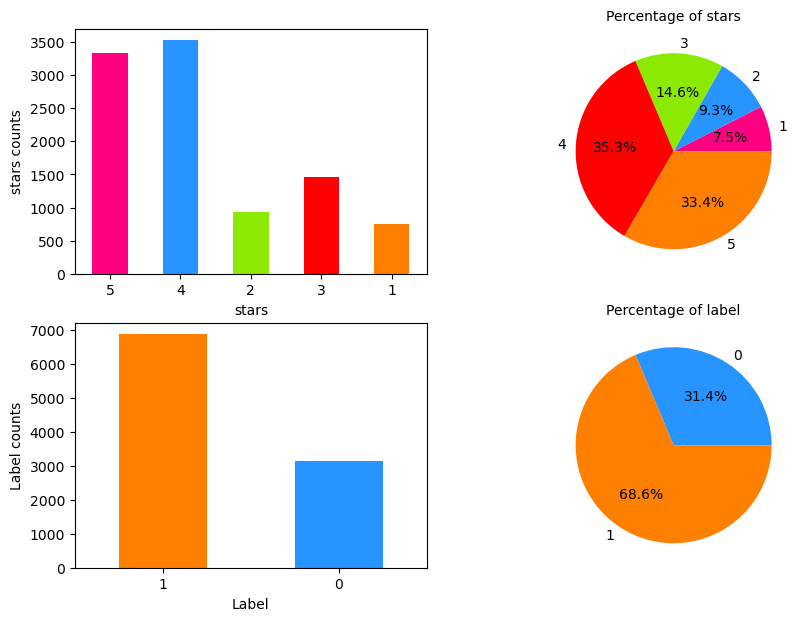

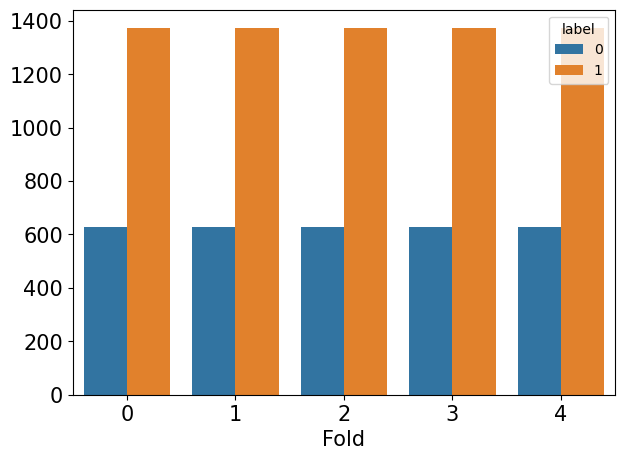

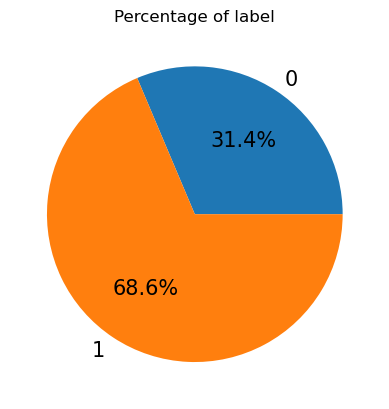

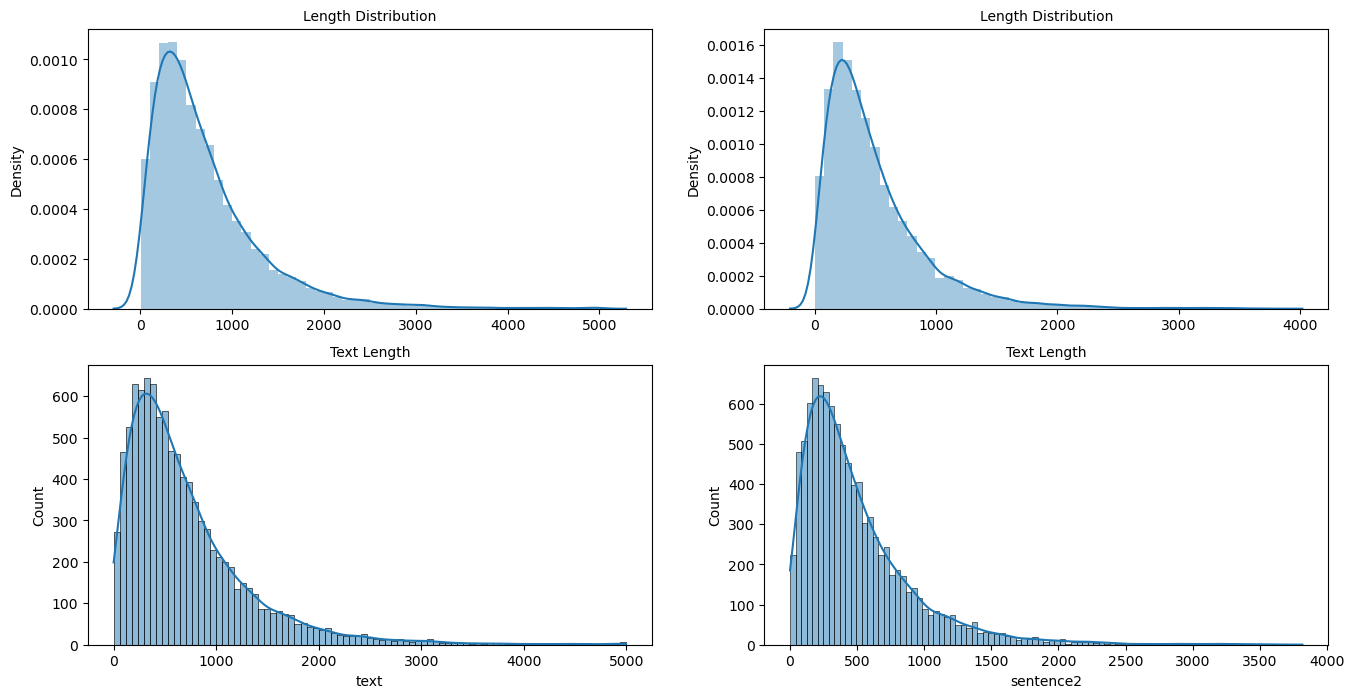

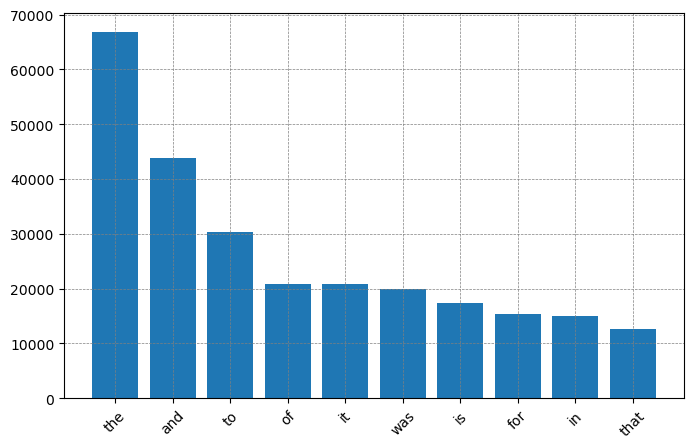

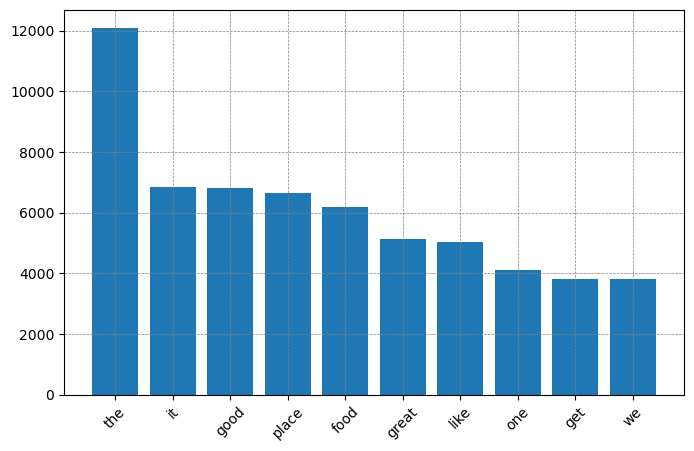

In [15]:
df = pd.read_csv(os.path.join(FILE_ROOT, FILE_NAME))

get_stat(df)
get_folder_hist(df)
get_pie(df)
get_distribute_pic(df)
get_topN_freq_word(df, key='sentence3')
get_topN_freq_word(df, key='sentence2')